In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import (
    Dense
)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import time

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [27]:
X = df.loc[:, ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
y = pd.get_dummies(df.loc[:, 'variety']).values     # one hot encoding

# Normalize data
X[:, :] = (X[:, :] - np.mean(X[:, :], axis=0)) / np.std(X[:, :], axis=0)

# split train & test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Build model
model = Sequential()
model.add(Dense(units=3, activation='softmax'))

start_train = time.time()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

history = model.fit(x_train, y_train, batch_size=32, epochs=1000, verbose=1)
end_train = time.time()

Epoch 1/1000
4/4 [==============================] - 1s 2ms/step - loss: 1.1432 - accuracy: 0.4333
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1331 - accuracy: 0.4417
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.1232 - accuracy: 0.4750
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.1132 - accuracy: 0.4750
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1036 - accuracy: 0.4833
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0938 - accuracy: 0.4917
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0843 - accuracy: 0.4917
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0749 - accuracy: 0.4917
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0659 - accuracy: 0.4917
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0565 - accuracy: 0.5083
Epoch 11/1000
4/4 [

In [32]:
start_test = time.time()
model.evaluate(x_test, y_test)
end_test = time.time()

1/1 [==============================] - 0s 35ms/step - loss: 0.1215 - accuracy: 1.0000


In [30]:
print(f"- Training time: {end_train - start_train:.3f} (s)")
print(f"- Testing time: {end_test - start_test:.3f} (s)")

- Training time: 15.210 (s)
- Testing time: 0.215 (s)


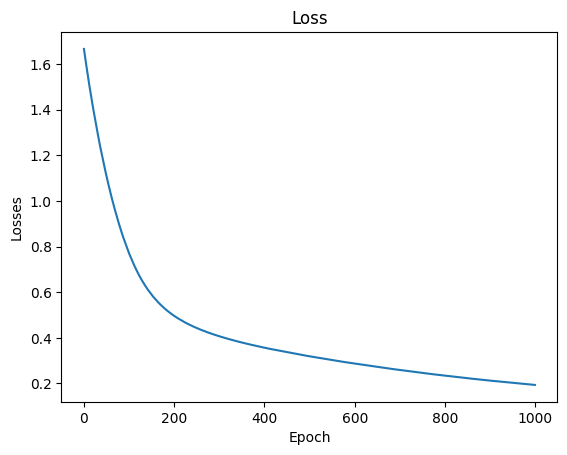

In [22]:
plt.plot(np.arange(0, 1000, 1), history.history['loss'])
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.show()